In [165]:
import pandas as pd
import sqlite3 as sq

In [166]:
db=sq.connect('IMDB.sqlite')

In [3]:
data=pd.read_sql_query('Select * from IMDB',db)

In [4]:
data

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS
0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,161460,...,8.0,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0
1,30114,127 Hours (2010),7.6,297075,82,18000000.0,94 min,28939,44110,98845,...,7.5,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6
2,37367,50/50 (2011),7.7,283935,72,8000000.0,100 min,28304,47501,99524,...,7.6,7.6,7.6,7.4,7.4,7.5,7.4,7.0,7.9,7.6
3,49473,About Time (2013),7.8,225412,,12000000.0,123 min,38556,43170,70850,...,7.6,7.6,7.7,7.6,7.5,7.8,7.7,6.9,7.8,7.7
4,14867,Amour (2012),7.9,76121,94,8900000.0,127 min,11093,15944,22942,...,7.7,7.7,7.9,7.9,7.8,8.1,6.6,7.2,7.9,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,38262,Whiplash (2014),8.5,492285,88,3300000.0,107 min,110404,161864,132656,...,8.3,8.3,8.2,8.1,8.1,8.2,8.7,8.0,8.6,8.4
113,10023,Wreck-It Ralph (2012),7.7,295125,72,165000000.0,,41980,50262,96477,...,7.6,7.6,7.7,7.4,7.4,7.5,7.4,7.2,7.9,7.6
114,27783,X-Men: Days of Future Past (2014),8.0,560736,74,200000000.0,132 min,91765,127521,183578,...,7.8,7.8,8.0,7.7,7.7,7.9,7.5,7.4,8.1,7.9
115,42294,X-Men: First Class (2011),7.8,556713,65,160000000.0,132 min,64428,96219,200144,...,7.7,7.6,7.8,7.6,7.5,7.7,7.6,7.3,7.8,7.7


In [5]:
data.columns.unique()

Index(['Movie_id', 'Title', 'Rating', 'TotalVotes', 'MetaCritic', 'Budget',
       'Runtime', 'CVotes10', 'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06',
       'CVotes05', 'CVotes04', 'CVotes03', 'CVotes02', 'CVotes01',
       'CVotesMale', 'CVotesFemale', 'CVotesU18', 'CVotesU18M', 'CVotesU18F',
       'CVotes1829', 'CVotes1829M', 'CVotes1829F', 'CVotes3044', 'CVotes3044M',
       'CVotes3044F', 'CVotes45A', 'CVotes45AM', 'CVotes45AF', 'CVotes1000',
       'CVotesUS', 'CVotesnUS', 'VotesM', 'VotesF', 'VotesU18', 'VotesU18M',
       'VotesU18F', 'Votes1829', 'Votes1829M', 'Votes1829F', 'Votes3044',
       'Votes3044M', 'Votes3044F', 'Votes45A', 'Votes45AM', 'Votes45AF',
       'VotesIMDB', 'Votes1000', 'VotesUS', 'VotesnUS'],
      dtype='object')

In [167]:
cur=db.cursor()

In [7]:
sql_query='SELECT g.genre, COUNT(*) AS num_movies FROM IMDB AS m JOIN genre AS g ON m.movie_id = g.movie_id WHERE g.genre != "''" GROUP BY g.genre;'
cur.execute(sql_query)

In [8]:
dataset=cur.fetchall()

In [9]:
dataset

[('Action', 33),
 ('Adventure', 43),
 ('Animation', 13),
 ('Biography', 21),
 ('Comedy', 31),
 ('Crime', 11),
 ('Drama', 77),
 ('Family', 3),
 ('Fantasy', 7),
 ('History', 6),
 ('Horror', 2),
 ('Music', 3),
 ('Musical', 1),
 ('Mystery', 7),
 ('Romance', 13),
 ('Sci-Fi', 18),
 ('Sport', 3),
 ('Thriller', 14),
 ('War', 2),
 ('Western', 2)]

In [10]:
for ele in dataset:
    print(ele[0],ele[1])

Action 33
Adventure 43
Animation 13
Biography 21
Comedy 31
Crime 11
Drama 77
Family 3
Fantasy 7
History 6
Horror 2
Music 3
Musical 1
Mystery 7
Romance 13
Sci-Fi 18
Sport 3
Thriller 14
War 2
Western 2


In [11]:
sql_query='SELECT m.rating FROM IMDB AS m JOIN earning AS e ON m.movie_id = e.movie_id ORDER BY e.domestic + e.worldwide DESC LIMIT 1;'
cur.execute(sql_query)

In [12]:
data=cur.fetchone()

In [13]:
data[0]

8.1

In [26]:
sql_query='Select title,totalvotes from IMDB order by totalvotes desc'
cur.execute(sql_query)

In [27]:
data=cur.fetchall()

In [34]:
print(data[0][0].split('(')[0],data[0][1])

Inception  1609713


In [35]:
sql_query='Select title,runtime from IMDB order by runtime desc'
cur.execute(sql_query)

In [37]:
data=pd.read_sql_query('Select * from IMDB',db)

In [40]:
data['runtime'] = data['Runtime'].str.split(' ').str[0]

In [41]:
data

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS,runtime
0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,161460,...,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0,134
1,30114,127 Hours (2010),7.6,297075,82,18000000.0,94 min,28939,44110,98845,...,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6,94
2,37367,50/50 (2011),7.7,283935,72,8000000.0,100 min,28304,47501,99524,...,7.6,7.6,7.4,7.4,7.5,7.4,7.0,7.9,7.6,100
3,49473,About Time (2013),7.8,225412,,12000000.0,123 min,38556,43170,70850,...,7.6,7.7,7.6,7.5,7.8,7.7,6.9,7.8,7.7,123
4,14867,Amour (2012),7.9,76121,94,8900000.0,127 min,11093,15944,22942,...,7.7,7.9,7.9,7.8,8.1,6.6,7.2,7.9,7.8,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,38262,Whiplash (2014),8.5,492285,88,3300000.0,107 min,110404,161864,132656,...,8.3,8.2,8.1,8.1,8.2,8.7,8.0,8.6,8.4,107
113,10023,Wreck-It Ralph (2012),7.7,295125,72,165000000.0,,41980,50262,96477,...,7.6,7.7,7.4,7.4,7.5,7.4,7.2,7.9,7.6,
114,27783,X-Men: Days of Future Past (2014),8.0,560736,74,200000000.0,132 min,91765,127521,183578,...,7.8,8.0,7.7,7.7,7.9,7.5,7.4,8.1,7.9,132
115,42294,X-Men: First Class (2011),7.8,556713,65,160000000.0,132 min,64428,96219,200144,...,7.6,7.8,7.6,7.5,7.7,7.6,7.3,7.8,7.7,132


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 53 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie_id      117 non-null    object 
 1   Title         117 non-null    object 
 2   Rating        117 non-null    float64
 3   TotalVotes    117 non-null    int64  
 4   MetaCritic    117 non-null    object 
 5   Budget        117 non-null    object 
 6   Runtime       117 non-null    object 
 7   CVotes10      117 non-null    object 
 8   CVotes09      117 non-null    object 
 9   CVotes08      117 non-null    object 
 10  CVotes07      117 non-null    object 
 11  CVotes06      117 non-null    object 
 12  CVotes05      117 non-null    object 
 13  CVotes04      117 non-null    object 
 14  CVotes03      117 non-null    object 
 15  CVotes02      117 non-null    object 
 16  CVotes01      117 non-null    object 
 17  CVotesMale    117 non-null    object 
 18  CVotesFemale  117 non-null    

In [48]:
data['runtime'].fillna('0',inplace=True)

In [50]:
data['runtime'].replace("",'0',inplace=True)

In [55]:
data['runtime']=data['runtime'].astype(int)

In [57]:
data.describe()

,Rating,TotalVotes,runtime
count,117.000000,1.170000e+02,117.000000
mean,7.873504,3.755791e+05,103.846154
std,0.237586,2.627056e+05,51.917643
min,7.500000,2.601600e+04,0.000000
25%,7.700000,2.223430e+05,100.000000
50%,7.800000,3.375710e+05,120.000000
75%,8.000000,5.125260e+05,134.000000
max,8.800000,1.609713e+06,180.000000


In [58]:
data_req=data[data['runtime']==180]

In [59]:
data_req

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS,runtime
105,35004,The Wolf of Wall Street (2013),8.2,881984,75,100000000.0,180 min,171660,236650,250667,...,8.1,7.7,7.6,7.6,7.5,7.8,7.8,8.1,8.1,180


In [67]:
for index, row in data_req.iterrows():
    print(row['Title'],180)

The Wolf of Wall Street (2013) 180


In [70]:
import pandas as pd
import sqlite3 as sq
db=sq.connect('IMDB.sqlite')
cur=db.cursor()
sql_query='SELECT m.title FROM IMDB AS m JOIN earning AS e ON m.movie_id = e.movie_id ORDER BY e.domestic + e.worldwide - m.budget DESC LIMIT 1;'
cur.execute(sql_query)
data=cur.fetchone()

In [71]:
data

('Star Wars: The Force Awakens\xa0(2015)',)

In [75]:
sql_query='Select title,budget from imdb order by budget desc'
cur.execute(sql_query)

In [76]:
data=cur.fetchall()

In [81]:
import pandas as pd
import sqlite3 as sq

# connect to the SQLite database
db = sq.connect('IMDB.sqlite')

# execute the SQL query and retrieve the result as a DataFrame
df = pd.read_sql_query("SELECT m.title FROM IMDB AS m JOIN earning AS e ON m.movie_id = e.movie_id WHERE m.budget = (SELECT MIN(budget) FROM IMDB) ORDER BY e.domestic + e.worldwide - m.budget DESC LIMIT 1;", db)

for index,row in df.iterrows():
    print(row['Title'])


Short Term 12 (2013)


In [148]:
conn=sq.connect('IMDB.sqlite')
imdb_df = pd.read_sql("SELECT * FROM IMDB", conn)
earning_df = pd.read_sql("SELECT * FROM earning", conn)
genre_df = pd.read_sql("SELECT * FROM genre", conn)

In [149]:
merged_df = pd.merge(imdb_df, earning_df, on='Movie_id')

In [150]:
merged_df['totalearning']=merged_df['Worldwide']+merged_df['Domestic']

In [151]:
merged_df['Year']=merged_df['Title'].str[-5:-1]

In [139]:
data=merged_df[merged_df['totalearning']==max(merged_df.totalearning)]

In [140]:
data

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,...,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS,Domestic,Worldwide,totalearning,Year
79,38626,Star Wars: The Force Awakens (2015),8.1,676732,81,245000000.0,136 min,155391,161810,166378,...,7.8,8.2,8.3,7.7,8.2,7.9,936662225,2.068224e+09,3.004886e+09,2015


In [87]:
data=pd.read_sql_query('Select * from IMDB',db)

In [88]:
data

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS
0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,161460,...,8.0,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0
1,30114,127 Hours (2010),7.6,297075,82,18000000.0,94 min,28939,44110,98845,...,7.5,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6
2,37367,50/50 (2011),7.7,283935,72,8000000.0,100 min,28304,47501,99524,...,7.6,7.6,7.6,7.4,7.4,7.5,7.4,7.0,7.9,7.6
3,49473,About Time (2013),7.8,225412,,12000000.0,123 min,38556,43170,70850,...,7.6,7.6,7.7,7.6,7.5,7.8,7.7,6.9,7.8,7.7
4,14867,Amour (2012),7.9,76121,94,8900000.0,127 min,11093,15944,22942,...,7.7,7.7,7.9,7.9,7.8,8.1,6.6,7.2,7.9,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,38262,Whiplash (2014),8.5,492285,88,3300000.0,107 min,110404,161864,132656,...,8.3,8.3,8.2,8.1,8.1,8.2,8.7,8.0,8.6,8.4
113,10023,Wreck-It Ralph (2012),7.7,295125,72,165000000.0,,41980,50262,96477,...,7.6,7.6,7.7,7.4,7.4,7.5,7.4,7.2,7.9,7.6
114,27783,X-Men: Days of Future Past (2014),8.0,560736,74,200000000.0,132 min,91765,127521,183578,...,7.8,7.8,8.0,7.7,7.7,7.9,7.5,7.4,8.1,7.9
115,42294,X-Men: First Class (2011),7.8,556713,65,160000000.0,132 min,64428,96219,200144,...,7.7,7.6,7.8,7.6,7.5,7.7,7.6,7.3,7.8,7.7


In [99]:
import sqlite3
import pandas as pd

# connect to the SQLite file
conn = sqlite3.connect('IMDB.sqlite')

# get a list of tables in the SQLite file
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table'", conn)
ls=[]
# loop through each table and convert it to a DataFrame
for table_name in tables['name']:
    df = pd.read_sql(f"SELECT * FROM {table_name}", conn)
    ls.append(df)
    


In [100]:
df_imdb=ls[0]
df_earning=ls[1]
df_genre=ls[2]

In [106]:
df_imdb.Budget.replace("",'0',inplace=True)

In [102]:
import matplotlib.pyplot as plt

In [108]:
df_imdb.Budget=df_imdb.Budget.astype(int)

In [110]:
df_imdb.describe()

,Rating,TotalVotes,Budget
count,117.000000,1.170000e+02,1.170000e+02
mean,7.873504,3.755791e+05,7.268376e+07
std,0.237586,2.627056e+05,7.504179e+07
min,7.500000,2.601600e+04,0.000000e+00
25%,7.700000,2.223430e+05,1.400000e+07
50%,7.800000,3.375710e+05,3.800000e+07
75%,8.000000,5.125260e+05,1.450000e+08
max,8.800000,1.609713e+06,2.600000e+08


In [113]:
merged_df = pd.merge(df_imdb, df_genre, on='Movie_id')

In [114]:
merged_df

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS,genre
0,36809,12 Years a Slave (2013),8.1,496092,96,20000000,134 min,75556,126223,161460,...,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0,Biography
1,36809,12 Years a Slave (2013),8.1,496092,96,20000000,134 min,75556,126223,161460,...,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0,Drama
2,36809,12 Years a Slave (2013),8.1,496092,96,20000000,134 min,75556,126223,161460,...,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0,History
3,30114,127 Hours (2010),7.6,297075,82,18000000,94 min,28939,44110,98845,...,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6,Adventure
4,30114,127 Hours (2010),7.6,297075,82,18000000,94 min,28939,44110,98845,...,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6,Biography
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,42294,X-Men: First Class (2011),7.8,556713,65,160000000,132 min,64428,96219,200144,...,7.6,7.8,7.6,7.5,7.7,7.6,7.3,7.8,7.7,Adventure
347,42294,X-Men: First Class (2011),7.8,556713,65,160000000,132 min,64428,96219,200144,...,7.6,7.8,7.6,7.5,7.7,7.6,7.3,7.8,7.7,Sci-Fi
348,32217,Zootopia (2016),8.1,309474,78,150000000,108 min,53626,70912,102352,...,7.8,8.1,7.8,7.8,8.1,7.7,7.6,8.0,8.0,Animation
349,32217,Zootopia (2016),8.1,309474,78,150000000,108 min,53626,70912,102352,...,7.8,8.1,7.8,7.8,8.1,7.7,7.6,8.0,8.0,Adventure


: 5.56%
Action: 16.98%
Adventure: 23.7%
Animation: 7.23%
Biography: 2.45%
Comedy: 6.82%
Crime: 1.67%
Drama: 10.25%
Family: 1.8%
Fantasy: 4.29%
History: 0.68%
Horror: 0.03%
Music: 0.15%
Musical: 0.24%
Mystery: 1.84%
Romance: 1.06%
Sci-Fi: 10.18%
Sport: 0.43%
Thriller: 3.77%
War: 0.34%
Western: 0.54%


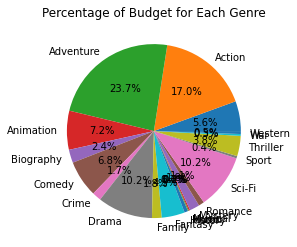

In [117]:
# group the merged DataFrame by genre and sum the budget column
grouped_df = merged_df.groupby('genre')['Budget'].sum()

# calculate the percentage of the total budget for each genre
total_budget = grouped_df.sum()
percentages = grouped_df / total_budget * 100

# round the percentages to 2 decimal places
percentages = percentages.round(2)

# print the genre and percentage for each genre
for genre, percentage in percentages.iteritems():
    print(f"{genre}: {percentage}%")

# plot the pie chart
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')
plt.title("Percentage of Budget for Each Genre")
plt.show()

: 6.9%
Action: 16.68%
Adventure: 21.94%
Animation: 6.3%
Biography: 3.18%
Comedy: 7.16%
Crime: 1.44%
Drama: 11.13%
Family: 0.98%
Fantasy: 4.8%
History: 0.97%
Horror: 0.01%
Music: 0.4%
Musical: 0.35%
Mystery: 1.87%
Romance: 1.35%
Sci-Fi: 9.26%
Sport: 0.3%
Thriller: 4.12%
War: 0.24%
Western: 0.61%


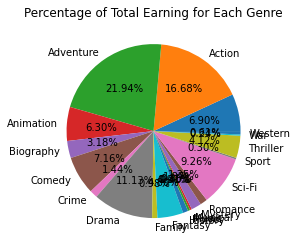

In [120]:
# read the IMDB and genre tables into DataFrames
imdb_df = pd.read_sql("SELECT * FROM IMDB", conn)
earning_df = pd.read_sql("SELECT * FROM earning", conn)
genre_df = pd.read_sql("SELECT * FROM genre", conn)

# merge the three DataFrames on the movie_id column
merged_df = pd.merge(imdb_df, earning_df, on='Movie_id')
merged_df = pd.merge(merged_df, genre_df, on='Movie_id')

# calculate the total earning for each movie
merged_df['total_earning'] = merged_df['Domestic'] + merged_df['Worldwide']

# drop rows with empty genre values
merged_df = merged_df.dropna(subset=['genre'])

# group the merged DataFrame by genre and sum the total earning column
grouped_df = merged_df.groupby('genre')['total_earning'].sum()

# calculate the percentage of the total earning for each genre
total_earning = grouped_df.sum()
percentages = grouped_df / total_earning * 100

# round the percentages to 2 decimal places
percentages = percentages.round(2)

# print the genre and percentage for each genre
for genre, percentage in percentages.iteritems():
    print(f"{genre}: {percentage}%")

# plot the pie chart
plt.pie(percentages, labels=percentages.index, autopct='%1.2f%%')
plt.title("Percentage of Total Earning for Each Genre")
plt.show()

In [152]:
merged_df = pd.merge(merged_df, genre_df, on='Movie_id')

In [153]:
merged_df=merged_df[merged_df['Rating']>=8]

In [156]:
merged_df=merged_df[(merged_df['genre']=='Sci-Fi') | (merged_df['genre']=='Mystery')]

In [157]:
merged_df

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,...,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS,Domestic,Worldwide,totalearning,Year,genre
19,31722,Arrival (2016),8.0,370842,81,47000000.0,116 min,55533,87850,109536,...,7.7,8.3,7.3,8.0,7.9,100546139,2.033882e+08,3.039343e+08,2016,Mystery
20,31722,Arrival (2016),8.0,370842,81,47000000.0,116 min,55533,87850,109536,...,7.7,8.3,7.3,8.0,7.9,100546139,2.033882e+08,3.039343e+08,2016,Sci-Fi
98,13277,Gone Girl (2014),8.1,649474,79,61000000.0,149 min,89539,177373,218018,...,7.7,8.2,7.6,8.1,8.1,167767189,3.693304e+08,5.370976e+08,2014,Mystery
104,11289,Guardians of the Galaxy (2014),8.1,778220,76,170000000.0,121 min,156606,185326,216876,...,8.0,8.3,7.6,8.3,7.9,333176600,7.733286e+08,1.106505e+09,2014,Sci-Fi
116,21768,Her (2013),8.0,398431,90,23000000.0,126 min,61098,95920,117761,...,7.0,7.7,7.3,8.1,7.9,25568251,4.735125e+07,7.291950e+07,2013,Sci-Fi
137,46824,Inception (2010),8.8,1609713,74,160000000.0,148 min,584839,485218,304457,...,8.0,8.6,8.2,8.7,8.8,292576195,8.255328e+08,1.118109e+09,2010,Sci-Fi
143,46900,Interstellar (2014),8.6,1075163,74,165000000.0,169 min,394006,291172,199884,...,7.7,8.2,7.9,8.4,8.5,188020017,6.751200e+08,8.631400e+08,2014,Sci-Fi
167,36478,Mad Max: Fury Road (2015),8.1,649540,90,150000000.0,120 min,136194,158403,163494,...,7.2,8.6,8.0,8.2,8.0,153636354,3.788583e+08,5.324947e+08,2015,Sci-Fi
200,37979,Prisoners (2013),8.1,441037,74,46000000.0,153 min,57400,110853,161533,...,7.8,7.9,7.6,8.1,8.0,61002302,1.221267e+08,1.831290e+08,2013,Mystery
216,36011,Shutter Island (2010),8.1,871391,63,80000000.0,138 min,150405,230844,278844,...,7.6,7.3,7.6,7.8,8.1,128012934,2.948042e+08,4.228171e+08,2010,Mystery


In [168]:
sql_query='SELECT title FROM IMDB WHERE imdb.rating >= 8.0 AND movie_id IN (SELECT movie_id FROM genre WHERE genre IN ("Sci-Fi", "Mystery") GROUP BY movie_id HAVING COUNT(*) = 2)'
cur.execute(sql_query)

In [169]:
da=cur.fetchall()

In [173]:
print(da[0][0])

Arrival (2016)
